#Problema de la guía 4  
###S. Schiavinato - LU 153/11

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
plt.rcParams["figure.figsize"] = (5 * (1 + np.sqrt(5)) / 2, 5)
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12

Defino la densidad de masa

In [2]:
%%latex
\[\rho(r) = \frac{\rho_0}{1 + \left(\frac{r}{r_e}\right)^2}\]

<IPython.core.display.Latex object>

La probabilidad de que un elemento de fluido esté en una posición r del espacio es proporcional a la masa ocupada en un diferencia dV alrededor de ese punto, es decir

In [3]:
%%latex
\[p(\vec{r}) = \rho(r) dV = \rho(r) \,r^2 \, \text{sen}(\theta)\, dr d\theta d\phi = f(r,\theta, \phi) dr d\theta d\phi \]

<IPython.core.display.Latex object>

Calculemos las marginalizadas, que corresponde a integrar en las otras variables

In [4]:
%%latex
\[ f(r) = a \int^{2\pi}_{0} \int^{\pi}_{0} \rho(r) r^2 \text{sen}(\theta) d\theta d\phi = 4\pi a r^2 \rho(r) = \frac{4 \pi a \rho_0 r^2}{1 + \left(\frac{r}{r_e}\right)^2} \]
\[f(\theta) = b \int_{0}^{r_e} \int_{0}^{2\pi} \rho(r) r^2 \text{sen}(\theta) dr d\phi = 2\pi b \;\text{sen}(\theta) \int_{0}^{r_e} \rho(r) r^2 dr = 2 \pi b \; \text{sen}(\theta) \; r_e^3 \left(1-\frac{\pi}{4}\right)\]
\[f(\phi) = c \int_{0}^{r_e} \int_{0}^{\pi} \rho(r) r^2 \text{sen}(\theta) dr d\theta = 2 c \int_{0}^{r_e} \rho(r) r^2 dr =  2 c r_e^3 \left(1-\frac{\pi}{4}\right) = \text{cte}\]

<IPython.core.display.Latex object>

Ahora normalizo las funciones de distribución marginales

In [5]:
%%latex
\[ a \int_{0}^{r_e} f(r) dr = 1 \Rightarrow \frac{1}{a} = 4 \pi \rho_0  r_e^3 \left(1-\frac{\pi}{4}\right) \Rightarrow f(r) = \frac{r^2}{r_e^3\left(1-\frac{\pi}{4}\right) \left(1 + \left(\frac{r}{r_e}\right)^2\right) } = \frac{r^2 \rho(r)}{\rho_0 r_e^3\left(1-\frac{\pi}{4}\right)} \]
\[ b \int_{0}^{\pi} f(\theta) d\theta = 1 \Rightarrow b \; 4 \pi r_e^3 \left(1-\frac{\pi}{4}\right) = 1 \Rightarrow  f(\theta) = \frac{\text{sen}(\theta)}{2}\]
\[ c \int_{0}^{2\pi} f(\phi) d\phi = 1 \Rightarrow f(\phi) = \frac{1}{2\pi} \]

<IPython.core.display.Latex object>

Paso a definir las funciones distribución de probabilidad que nos interesa para este problema

In [6]:
rho = lambda r, rc, rho0: rho0 / (1 + (r/rc)**2)
fR = lambda x, rho0, rc: x**2 * rho(x, rc, rho0) / (rc**3*rho0*(1 - np.pi/4)) #PDF en la variable R
fTh = lambda x: np.sin(x) / 2

Defino los parámetros físicos del problema, o determino las unidades de lo que observo

In [7]:
rc = 1
rho0 = 1

Grafico una al lado de la otra las distribución de probabilidades. Además integro la distribución en r para ver si está normalizada efectivamente

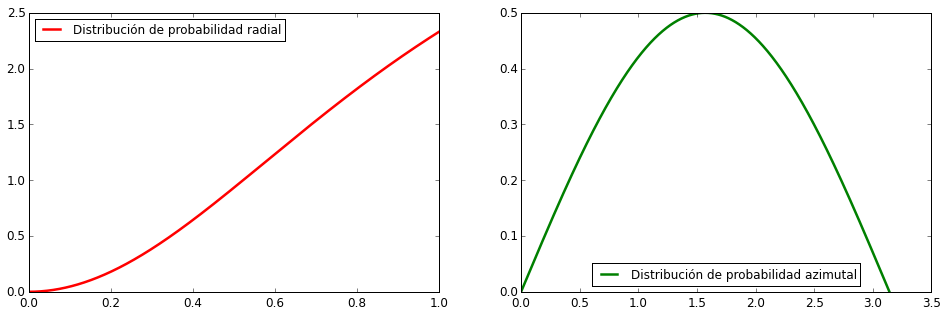

In [8]:
r = np.linspace(0, rc, 1000)
θ = np.linspace(0, np.pi, 1000)
plt.figure(1, figsize=((10 * (1 + np.sqrt(5)) / 2, 5)))
plt.subplot(121)
plt.plot(r, fR(r, rc, rho0),'r-', label="Distribución de probabilidad radial")
plt.legend(loc=0)
plt.subplot(122)
plt.plot(θ, fTh(θ),'g-', label="Distribución de probabilidad azimutal")
plt.legend(loc=0);

In [9]:
print(integrate.quad(lambda x: fR(x, rc, rho0), 0, rc)) #Integro numéricamente

(1.0, 1.1102230246251565e-14)


Ahora por el método Monte Carlo aceptación-rechazo genero números al azar con las distribuciones de antes. Grafico el histograma de cada uno 

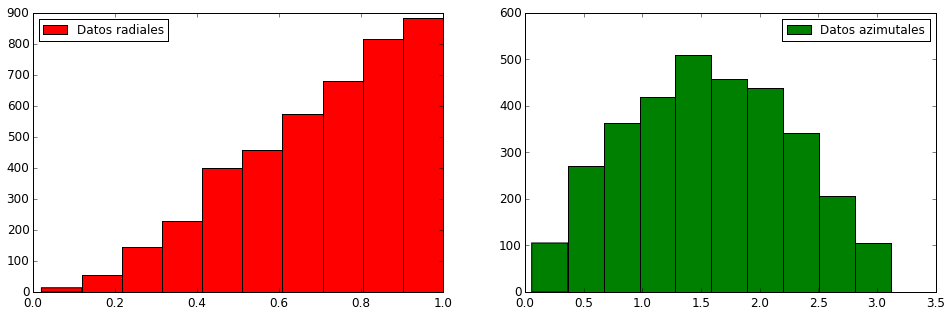

In [10]:
#Vectores para contabilizaar datos
Ar = []
Ath = []
#Variables aleatorias
r = rnd.uniform(0, 1, 10000)
th = rnd.uniform(0, 2*np.pi, 10000)
#
for i in r:
    vR = rnd.uniform(0, fR(rc,rc,rho0))
    if (fR(i,rc,rho0) > vR):
        Ar.append(i)

for i in th:
    vTh = rnd.uniform(0, fTh(np.pi/2))
    if (fTh(i) > vTh):
        Ath.append(i)

#Grafico ambos histogramas
plt.figure(2, figsize=((10 * (1 + np.sqrt(5)) / 2, 5)))
plt.subplot(121)
plt.hist(Ar, color='r',label="Datos radiales")
plt.legend(loc=0)
plt.subplot(122)
plt.hist(Ath, color='g',label="Datos azimutales")
plt.legend(loc=0);

Ahora grafico ambos histogramas a la vez, para observar correlación entre las variables

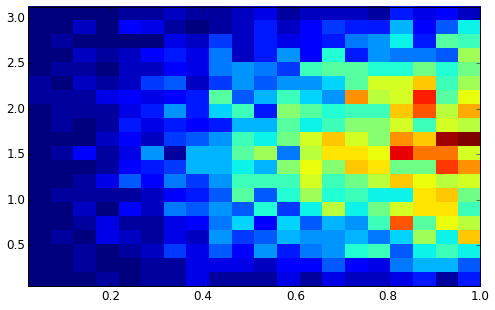

In [11]:
#Como no puedo prefijar la cantidad de cuentas, elijo la cantidad más chica
L = 0
if (len(Ar)<len(Ath)):
    L = len(Ar)
else:
    L = len(Ath)
plt.hist2d(Ar[:L],Ath[:L], bins = 20);